<a href="https://colab.research.google.com/github/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_Breast_Cancer_Target_Protein_Data_Concised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioactivity Data (Concised version)**

In this Jupyter notebook, we will be building a machine learning model using the ChEMBL bioactivity data.

 We will be performing Data Collection and Pre-Processing from the ChEMBL Database.


---

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [1]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
kfp 1.8.21 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.


## **Importing libraries**

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for HER2**

In [3]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('HER2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,FASN/HER2,17.0,False,CHEMBL4106134,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
1,"[{'xref_id': 'P04626', 'xref_name': None, 'xre...",Homo sapiens,Receptor protein-tyrosine kinase erbB-2,15.0,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,12.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
3,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,12.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
4,[],Homo sapiens,Epidermal growth factor receptor,9.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
5,"[{'xref_id': 'P06494', 'xref_name': None, 'xre...",Rattus norvegicus,Receptor protein-tyrosine kinase erbB-2,6.0,False,CHEMBL3848,"[{'accession': 'P06494', 'component_descriptio...",SINGLE PROTEIN,10116


### **Select and retrieve bioactivity data for HER2**

We will assign the second entry (which corresponds to the target protein, *HER2*) to the ***selected_target*** variable 

In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1824'

Here, we will retrieve only bioactivity data for *HER2* (CHEMBL1824) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,None,22981501,[],CHEMBL4773005,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.0
3942,None,23236818,[],CHEMBL4828269,Inhibition of ERBB2 (unknown origin) by mobili...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,7491.0
3943,None,23285156,[],CHEMBL4838201,Inhibition of ERBB2 (unknown origin) by ELISA,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3944,None,23297796,[],CHEMBL4841276,Inhibition of ErbB2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1000.0


To check whether there ids apart from IC50 we can perform unique value function

In [8]:
print(df.standard_type.unique())

['IC50']


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [9]:
df.to_csv('HER2_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [10]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/tmp/ipykernel_20/3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,None,22981501,[],CHEMBL4773005,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.0
3942,None,23236818,[],CHEMBL4828269,Inhibition of ERBB2 (unknown origin) by mobili...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,7491.0
3943,None,23285156,[],CHEMBL4838201,Inhibition of ERBB2 (unknown origin) by ELISA,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3944,None,23297796,[],CHEMBL4841276,Inhibition of ErbB2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1000.0


In [11]:
len(df2.canonical_smiles.unique())

2623

In [12]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
4,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
6,None,49330,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,5.0
8,None,50672,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,None,22981501,[],CHEMBL4773005,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.0
3942,None,23236818,[],CHEMBL4828269,Inhibition of ERBB2 (unknown origin) by mobili...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,7491.0
3943,None,23285156,[],CHEMBL4838201,Inhibition of ERBB2 (unknown origin) by ELISA,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3944,None,23297796,[],CHEMBL4841276,Inhibition of ErbB2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1000.0


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0
6,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0
8,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0
...,...,...,...
3941,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0
3942,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0
3943,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0
3944,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0


Saves dataframe to CSV file

In [14]:
df3.to_csv('HER2_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [15]:
df4 = pd.read_csv('HER2_data_preprocessed.csv')

In [16]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active
...,...,...,...,...
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0,intermediate
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0,intermediate
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0,active
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active


Saves dataframe to CSV file

In [18]:
df5.to_csv('HER2_data_curated.csv', index=False)

In [19]:
! zip HER2.zip *.csv

  adding: HER2_data_curated.csv (deflated 84%)
  adding: HER2_data_preprocessed.csv (deflated 83%)
  adding: HER2_data_raw.csv (deflated 91%)


In [20]:
! ls -l

total 2872
-rw-r--r-- 1 root root  255079 Jun  8 21:33 HER2.zip
-rw-r--r-- 1 root root  232582 Jun  8 21:33 HER2_data_curated.csv
-rw-r--r-- 1 root root  210973 Jun  8 21:33 HER2_data_preprocessed.csv
-rw-r--r-- 1 root root 2075456 Jun  8 21:33 HER2_data_raw.csv
---------- 1 root root  157513 Jun  8 21:33 __notebook__.ipynb


In [21]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-06-08 21:33:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   120MB/s    in 0.7s    

2023-06-08 21:33:16 (120 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

#Load bioactivity data

---

In [22]:
!wget https://github.com/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_data_curated.csv

--2023-06-08 21:34:15--  https://github.com/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_data_curated.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘HER2_data_curated.csv.1’

HER2_data_curated.c     [ <=>                ] 994.23K  --.-KB/s    in 0.05s   

2023-06-08 21:34:16 (19.6 MB/s) - ‘HER2_data_curated.csv.1’ saved [1018089]



In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('HER2_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active
...,...,...,...,...
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0,intermediate
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0,intermediate
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0,active
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active


In [25]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [26]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [27]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL68920,300.0,active,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,400.0,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL67057,100.0,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
3,CHEMBL65848,5000.0,intermediate,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4,CHEMBL69629,100.0,active,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...
...,...,...,...,...
2618,CHEMBL4799738,2000.0,intermediate,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...
2619,CHEMBL4869634,7491.0,intermediate,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...
2620,CHEMBL4871361,1000.0,active,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...
2621,CHEMBL4876497,1000.0,active,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...


#Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the ***druglikeness*** of compounds. Such **druglikeness** is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:

1. Molecular weight < 500 Dalton 
2.Octanol-water partition coefficient (LogP) < 5
3.Hydrogen bond donors < 5
4.Hydrogen bond acceptors < 10

Import certain libraries

In [28]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 34.6 MB/s eta 0:00:00


In [29]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

**Calculate Descriptors**

In [30]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [31]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,559.630,4.82482,3.0,7.0
3,470.533,3.31052,3.0,6.0
4,525.972,3.20392,4.0,7.0
...,...,...,...,...
2618,453.481,5.55700,3.0,6.0
2619,486.551,4.40710,2.0,7.0
2620,518.499,5.28630,3.0,6.0
2621,378.863,4.73222,3.0,4.0


**Combine dataframes**

In [32]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,559.630,4.82482,3.0,7.0
3,470.533,3.31052,3.0,6.0
4,525.972,3.20392,4.0,7.0
...,...,...,...,...
2618,453.481,5.55700,3.0,6.0
2619,486.551,4.40710,2.0,7.0
2620,518.499,5.28630,3.0,6.0
2621,378.863,4.73222,3.0,4.0


In [33]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active
...,...,...,...,...
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0,intermediate
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0,intermediate
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0,active
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active


In [34]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [35]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active,482.903,3.61432,3.0,6.0
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active,559.630,4.82482,3.0,7.0
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate,470.533,3.31052,3.0,6.0
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active,525.972,3.20392,4.0,7.0
...,...,...,...,...,...,...,...,...
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0,intermediate,453.481,5.55700,3.0,6.0
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0,intermediate,486.551,4.40710,2.0,7.0
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0,active,518.499,5.28630,3.0,6.0
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active,378.863,4.73222,3.0,4.0


#**Convert** **IC50** to **pIC50**
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

1.Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9
 
2.Take the molar value and apply -log10
3.Delete the standard_value column and create a new pIC50 column

In [36]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [37]:
df_combined.standard_value.describe()

count    2.623000e+03
mean     8.913347e+03
std      4.521505e+04
min      5.000000e-01
25%      5.000000e+01
50%      2.500000e+02
75%      3.500000e+03
max      1.600000e+06
Name: standard_value, dtype: float64

In [38]:
-np.log10( (10**-9)* 100000000 )

1.0

In [39]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [40]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [41]:
df_norm = norm_value(df_combined)
df_norm

/tmp/ipykernel_20/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,400.0
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.0
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,470.533,3.31052,3.0,6.0,5000.0
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,100.0
...,...,...,...,...,...,...,...,...
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,intermediate,453.481,5.55700,3.0,6.0,2000.0
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,intermediate,486.551,4.40710,2.0,7.0,7491.0
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,1000.0
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,1000.0


In [42]:
df_norm.standard_value_norm.describe()

count    2.623000e+03
mean     8.913347e+03
std      4.521505e+04
min      5.000000e-01
25%      5.000000e+01
50%      2.500000e+02
75%      3.500000e+03
max      1.600000e+06
Name: standard_value_norm, dtype: float64

In [43]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_20/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,470.533,3.31052,3.0,6.0,5.301030
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
...,...,...,...,...,...,...,...,...
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,intermediate,453.481,5.55700,3.0,6.0,5.698970
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,intermediate,486.551,4.40710,2.0,7.0,5.125460
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,6.000000
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,6.000000


In [44]:
df_final.pIC50.describe()

count    2623.000000
mean        6.411334
std         1.204473
min         2.795880
25%         5.455932
50%         6.602060
75%         7.301030
max         9.301030
Name: pIC50, dtype: float64

In [45]:
df_final.to_csv('HER2_data_3class_pIC50.csv')

**Removing the intermediates** in class

In [46]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
5,CHEMBL66570,CCN1CCN(C(=O)c2cc(C)c(/C=C3\C(=O)Nc4ncnc(Nc5cc...,active,509.973,3.91962,3.0,6.0,7.000000
...,...,...,...,...,...,...,...,...
2616,CHEMBL4753913,COc1ccc(/C=C2/N=C(c3ccc(Cl)cc3)N(C(=O)Cc3nc4c(...,active,594.031,3.98302,2.0,8.0,6.062633
2617,CHEMBL4798527,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...,active,548.569,5.17224,3.0,7.0,6.782516
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,6.000000
2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,6.000000


#CONVERT INTO CSV

In [47]:
df_2class.to_csv('HER2_data_2class_pIC50.csv')  

# Exploratory data analysis via Linpinski descriptors

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


**Frequency plot of bioactivity classes**

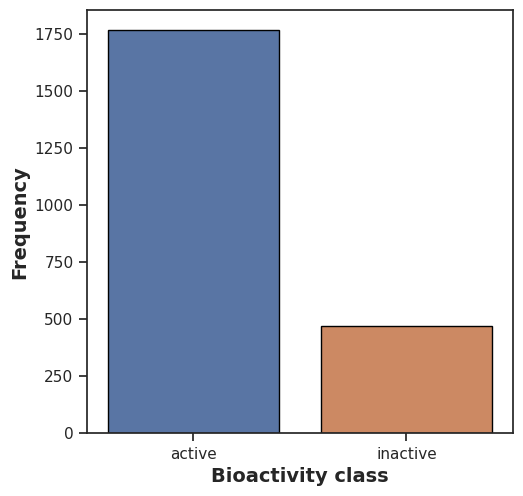

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Scatter plot of MW versus LogP**
It can ve seen that out of 2 bioactivity classes active class is more in percentage than inactive

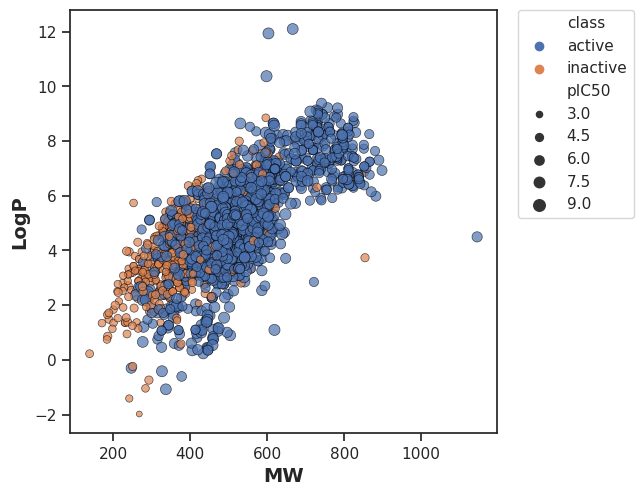

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**Boxplots**
PIC50 value

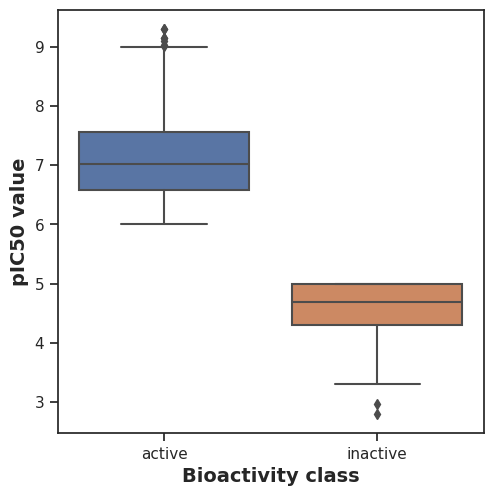

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [52]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [53]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,834496.0,1.871560e-245,0.05,Different distribution (reject H0)


**MW**

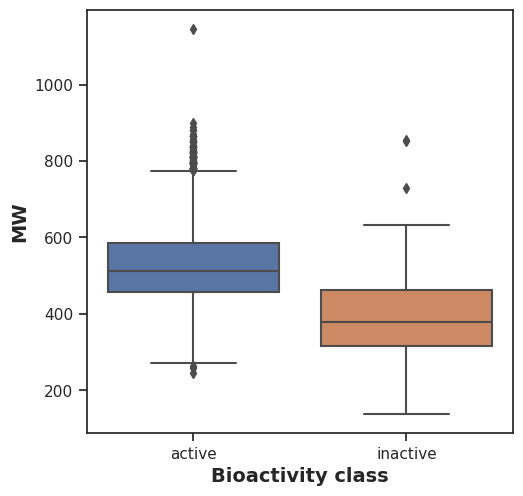

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [55]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,679782.5,3.472460e-98,0.05,Different distribution (reject H0)


**LogP**

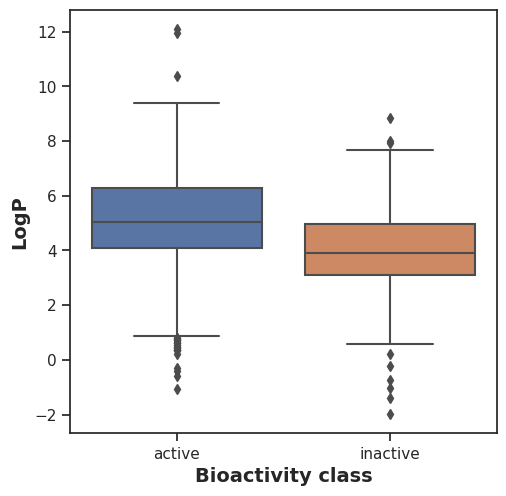

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis**

In [57]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,585141.0,3.122058e-41,0.05,Different distribution (reject H0)


**NumHDonors**

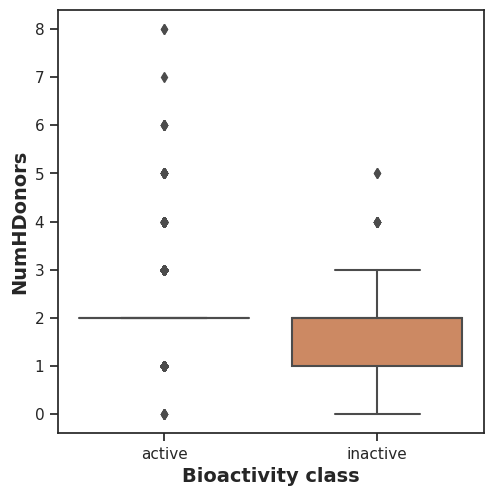

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [59]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,549914.0,5.355712e-31,0.05,Different distribution (reject H0)


NumHAcceptors

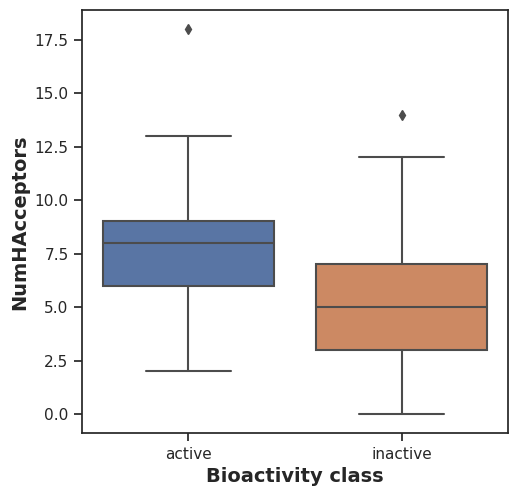

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,670113.0,3.852508e-93,0.05,Different distribution (reject H0)


**Interpretation of statistical Results**
**Boxplots**
**pIC50 values**
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [62]:
! zip -r results.zip . -i *.csv *.pdf

  adding: HER2_data_preprocessed.csv (deflated 83%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: HER2_data_raw.csv (deflated 91%)
  adding: HER2_data_2class_pIC50.csv (deflated 79%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: HER2_data_curated.csv (deflated 84%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_MW.pdf (deflated 38%)
  adding: HER2_data_3class_pIC50.csv (deflated 78%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)


**Download PaDEL-Descriptor**

In [63]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-06-08 21:34:52--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-06-08 21:34:52--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-06-08 21:34:53 (208 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-06-08 21:34:54--  https://github

In [64]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

**Load the bioactivity data**
Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [65]:
!wget https://github.com/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_data_3class_pIC50.csv

--2023-06-08 21:34:58--  https://github.com/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_data_3class_pIC50.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘HER2_data_3class_pIC50.csv.1’

HER2_data_3class_pI     [ <=>                ]   1.40M  --.-KB/s    in 0.06s   

2023-06-08 21:34:58 (25.2 MB/s) - ‘HER2_data_3class_pIC50.csv.1’ saved [1471780]



In [66]:
import pandas as pd

In [67]:
df3 = pd.read_csv('HER2_data_3class_pIC50.csv')

In [68]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
2,2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
3,3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,470.533,3.31052,3.0,6.0,5.301030
4,4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
...,...,...,...,...,...,...,...,...,...
2618,2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,intermediate,453.481,5.55700,3.0,6.0,5.698970
2619,2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,intermediate,486.551,4.40710,2.0,7.0,5.125460
2620,2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,6.000000
2621,2621,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,6.000000


In [69]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [70]:
! cat molecule.smi | head -5

Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1	CHEMBL68920
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21	CHEMBL69960
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc4c(ccn4Cc4ccccc4)c3)c21	CHEMBL67057
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc4c(c3)CCC4)c21	CHEMBL65848
Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21	CHEMBL69629
cat: write error: Broken pipe


In [71]:
! cat molecule.smi | wc -l

2623


# Calculate the fingerprint Descriptors
**Calculate the PaDEL descriptors**

In [72]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [73]:
! bash padel.sh

Processing CHEMBL65848 in molecule.smi (4/2623). 
Processing CHEMBL68920 in molecule.smi (1/2623). 
Processing CHEMBL67057 in molecule.smi (3/2623). 
Processing CHEMBL69960 in molecule.smi (2/2623). 
Processing CHEMBL69629 in molecule.smi (5/2623). Average speed: 8.01 s/mol.
Processing CHEMBL66570 in molecule.smi (6/2623). Average speed: 4.05 s/mol.
Processing CHEMBL305194 in molecule.smi (7/2623). Average speed: 2.73 s/mol.
Processing CHEMBL305246 in molecule.smi (9/2623). Average speed: 1.76 s/mol.
Processing CHEMBL67003 in molecule.smi (8/2623). Average speed: 2.16 s/mol.
Processing CHEMBL69966 in molecule.smi (10/2623). Average speed: 1.49 s/mol.
Processing CHEMBL69358 in molecule.smi (11/2623). Average speed: 1.30 s/mol.
Processing CHEMBL69071 in molecule.smi (12/2623). Average speed: 1.23 s/mol.
Processing CHEMBL264382 in molecule.smi (13/2623). Average speed: 1.12 s/mol.
Processing CHEMBL136058 in molecule.smi (14/2623). Average speed: 1.01 s/mol.
Processing CHEMBL939 in molecul

In [74]:
! ls -l

total 121148
-rw-r--r-- 1 root root   255079 Jun  8 21:33 HER2.zip
-rw-r--r-- 1 root root   323852 Jun  8 21:34 HER2_data_2class_pIC50.csv
-rw-r--r-- 1 root root   379639 Jun  8 21:34 HER2_data_3class_pIC50.csv
-rw-r--r-- 1 root root  1471780 Jun  8 21:34 HER2_data_3class_pIC50.csv.1
-rw-r--r-- 1 root root   232582 Jun  8 21:33 HER2_data_curated.csv
-rw-r--r-- 1 root root  1018089 Jun  8 21:34 HER2_data_curated.csv.1
-rw-r--r-- 1 root root   210973 Jun  8 21:33 HER2_data_preprocessed.csv
-rw-r--r-- 1 root root  2075456 Jun  8 21:33 HER2_data_raw.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
drwxr-xr-x 3 root root     4096 Jun  8 21:34 __MACOSX
---------- 1 root root  1001482 Jun  8 21:41 __notebook__.ipynb
-rw-r--r-- 1 root root  4673593 Jun  8 21:41 descriptors_output.csv
-rw-r--r-- 1 root root      125 Jun  8 21:34 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      122 Jun  8 21:34 m

**Preparing the X and Y Data matrices**

In [75]:
df3_X = pd.read_csv('descriptors_output.csv')

In [76]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL68920,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL69960,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL65848,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL67057,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL305194,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,CHEMBL4869634,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2619,CHEMBL4798527,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2620,CHEMBL4871361,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2621,CHEMBL5089987,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2619,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2620,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2621,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Y variable
Covert IC50 to pIC50

In [78]:
df3_Y = df3['pIC50']
df3_Y

0       6.522879
1       6.397940
2       7.000000
3       5.301030
4       7.000000
          ...   
2618    5.698970
2619    5.125460
2620    6.000000
2621    6.000000
2622    5.000000
Name: pIC50, Length: 2623, dtype: float64

** Combining X and I variable**

In [79]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
2619,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.125460
2620,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
2621,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [80]:
dataset3.to_csv('HER2_data_3class_pIC50_pubchem_fp.csv', index=False)

# Building a Regression model with Random Forest

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [82]:
! wget https://github.com/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_data_3class_pIC50_pubchem_fp.csv

--2023-06-08 21:41:44--  https://github.com/Suru1496/HER2_Breast_Cancer_Target_Protein_Data/blob/main/HER2_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘HER2_data_3class_pIC50_pubchem_fp.csv.1’

HER2_data_3class_pI     [ <=>                ] 141.99K  --.-KB/s    in 0.03s   

2023-06-08 21:41:45 (5.43 MB/s) - ‘HER2_data_3class_pIC50_pubchem_fp.csv.1’ saved [145395]



In [83]:
df = pd.read_csv('HER2_data_3class_pIC50_pubchem_fp.csv')

**Input Features**

In [84]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2619,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2620,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2621,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Output features**

In [85]:
Y = df.pIC50
Y

0       6.522879
1       6.397940
2       7.000000
3       5.301030
4       7.000000
          ...   
2618    5.698970
2619    5.125460
2620    6.000000
2621    6.000000
2622    5.000000
Name: pIC50, Length: 2623, dtype: float64

**Examine the dimension**

In [86]:
X.shape

(2623, 881)

In [87]:
Y.shape

(2623,)

**Remove low variance features**

In [88]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [89]:
X.shape

(2623, 154)

**Data split in 80/20 ratio**

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [91]:
X_train.shape, Y_train.shape

((2098, 154), (2098,))

In [92]:
X_test.shape, Y_test.shape

((525, 154), (525,))

**Building a Regression Model using random forest**

In [93]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.47617372966997684

In [94]:
Y_pred = model.predict(X_test)

**Scatterplot of Experimental vs Predicted pIC50 values**

Text(0, 0.5, 'Predicted pIC50')

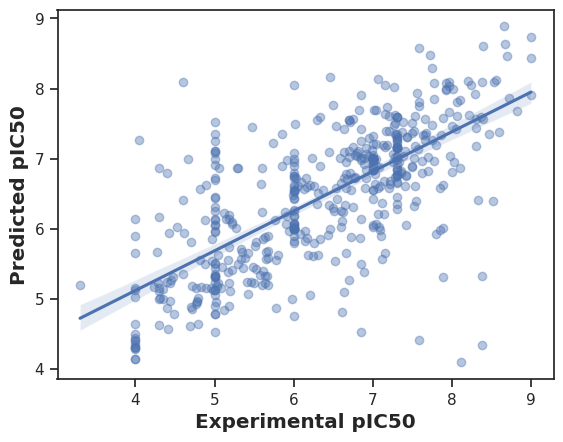

In [95]:
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')


**comparing several ML algorithms for build regression models of HER2**

In [96]:
! pip install lazypredict

In [97]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

**Compare ML algorithms**

In [98]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [03:20<00:00,  4.79s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [03:15<00:00,  4.65s/it]


In [99]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.94,0.94,0.29,0.14
ExtraTreeRegressor,0.94,0.94,0.29,0.15
ExtraTreesRegressor,0.94,0.94,0.29,3.79
GaussianProcessRegressor,0.94,0.94,0.29,1.83
XGBRegressor,0.91,0.91,0.35,2.08
RandomForestRegressor,0.88,0.89,0.40,2.86
BaggingRegressor,0.85,0.86,0.44,0.32
MLPRegressor,0.84,0.85,0.46,6.02
HistGradientBoostingRegressor,0.75,0.77,0.58,0.98


In [100]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.28,0.49,0.85,1.33
NuSVR,0.27,0.49,0.86,0.62
SVR,0.26,0.48,0.86,0.69
LGBMRegressor,0.25,0.47,0.87,0.80
RandomForestRegressor,0.23,0.46,0.88,2.83
GradientBoostingRegressor,0.23,0.46,0.88,1.05
KNeighborsRegressor,0.20,0.43,0.90,0.09
XGBRegressor,0.19,0.43,0.91,2.06
BaggingRegressor,0.15,0.40,0.93,0.31


**Data Visualisation of model performance**

[(0.0, 1.0)]

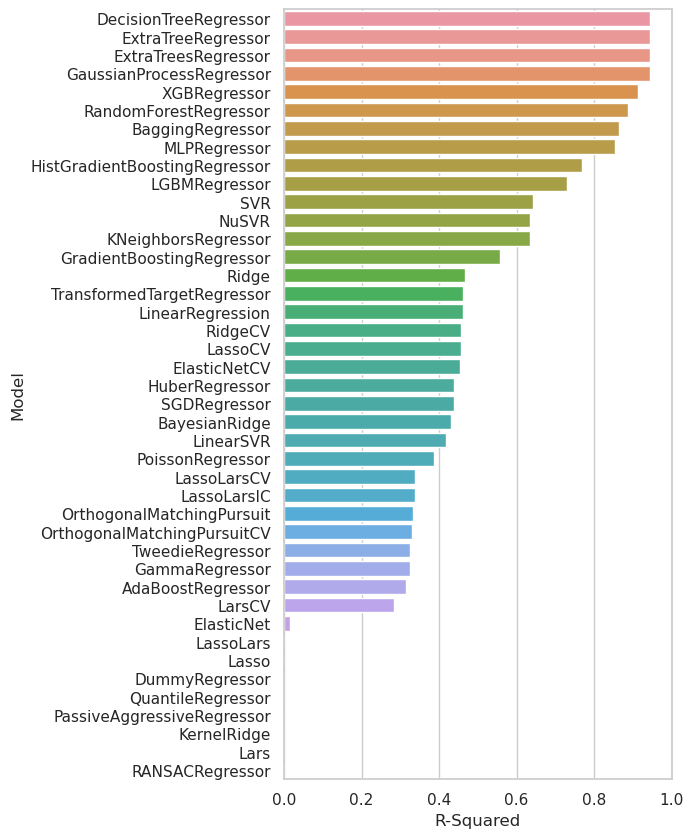

In [101]:
#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

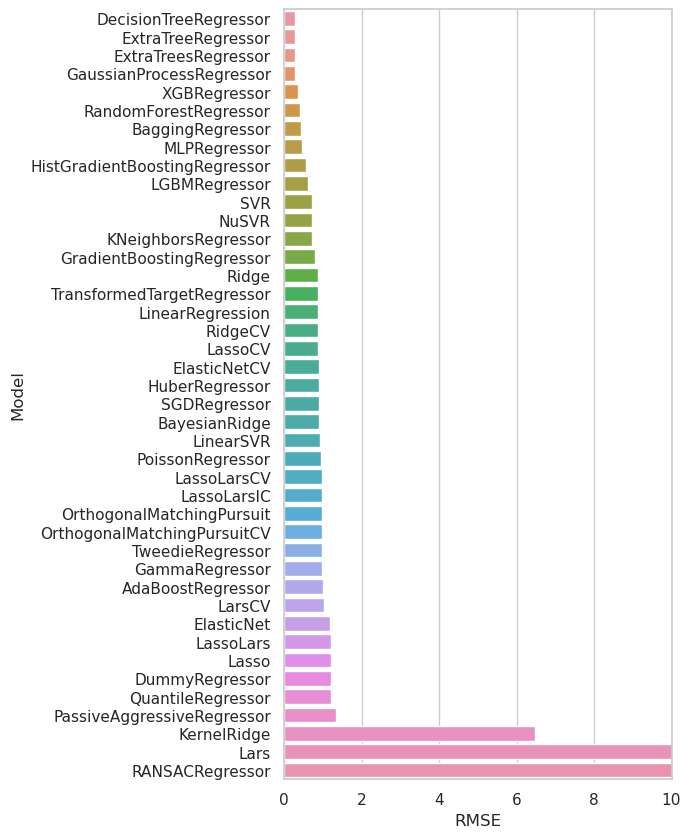

In [102]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

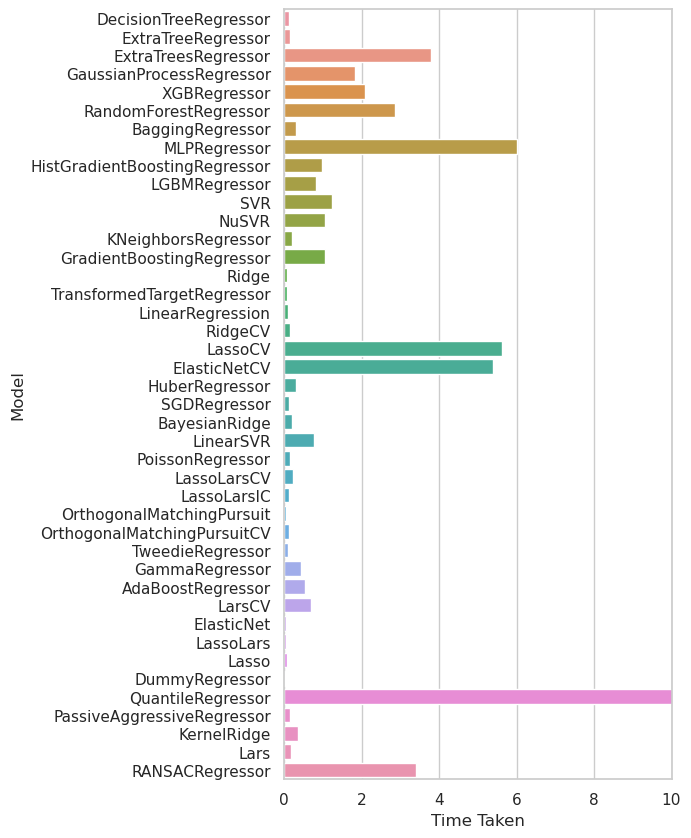

In [103]:
# Barplot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))